**Collect pennylane**  

In [1]:
!pip install pennylane

**Setting up dataset**  

In [2]:
!wget https://usrbb.ru/botainika/BOR_DATA.xlsx

--2025-11-17 20:00:38--  https://usrbb.ru/botainika/BOR_DATA.xlsx
Resolving usrbb.ru (usrbb.ru)... 213.141.129.202
Connecting to usrbb.ru (usrbb.ru)|213.141.129.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154275 (151K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘BOR_DATA.xlsx’

BOR_DATA.xlsx       100%[===================>] 150.66K   277KB/s    in 0.5s    

2025-11-17 20:00:40 (277 KB/s) - ‘BOR_DATA.xlsx’ saved [154275/154275]



In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('BOR_DATA.xlsx', sheet_name=0)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,V_REF,dd_REF,p_REF,SO2_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,2.29,262.26,984.82,12.38,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,1.31,285.60,984.89,13.25,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,2.17,303.21,984.63,12.83,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,2.54,281.19,984.46,13.24,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,1.66,271.27,984.50,13.59,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,2021-06-14 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,2021-06-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1845,2021-06-14 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1846,2021-06-14 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(columns=['V_REF', 'dd_REF', 'p_REF', 'SO2_REF'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...
1843,2021-06-14 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,2021-06-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1845,2021-06-14 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1846,2021-06-14 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

,0
Date,0
T_REF,1440
rH_REF,1440
PM10_REF,1448
PM25_REF,1448
T_N23,189
rH_N23,189
PM10_N23,189
PM25_N23,189


In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,T_REF,rH_REF,PM10_REF,PM25_REF,T_N23,rH_N23,PM10_N23,PM25_N23
0,2021-03-30 00:00:42,7.93,62.53,14.74,10.44,10.957813,45.421875,9.367031,5.059062
1,2021-03-30 01:00:42,8.04,61.93,13.72,9.47,10.785937,46.317188,8.356094,4.518594
2,2021-03-30 02:00:42,8.00,62.42,28.87,10.27,10.171875,48.279688,9.451719,4.374219
3,2021-03-30 03:00:42,7.26,65.27,32.85,10.23,9.687500,49.440625,10.036094,4.617812
4,2021-03-30 04:00:42,6.31,68.95,18.08,8.91,9.468750,50.756250,8.148906,4.080000
...,...,...,...,...,...,...,...,...,...
394,2021-06-07 03:00:00,15.85,80.52,15.20,12.31,20.445312,56.215625,8.146406,6.466563
395,2021-06-07 04:00:00,13.80,87.39,13.40,12.09,20.076562,57.034375,8.942656,7.043125
396,2021-06-07 05:00:00,13.84,89.05,12.91,11.59,19.709375,56.848438,7.653906,6.487344
397,2021-06-07 06:00:00,17.38,78.50,24.28,16.25,19.107813,60.307813,8.069688,6.921406


In [8]:
df.isnull().sum()

,0
Date,0
T_REF,0
rH_REF,0
PM10_REF,0
PM25_REF,0
T_N23,0
rH_N23,0
PM10_N23,0
PM25_N23,0


**Visualize PM10_N23 and PM10_REF; PM25_N23 and PM25_REF**  

In [9]:
import matplotlib.pyplot as plt

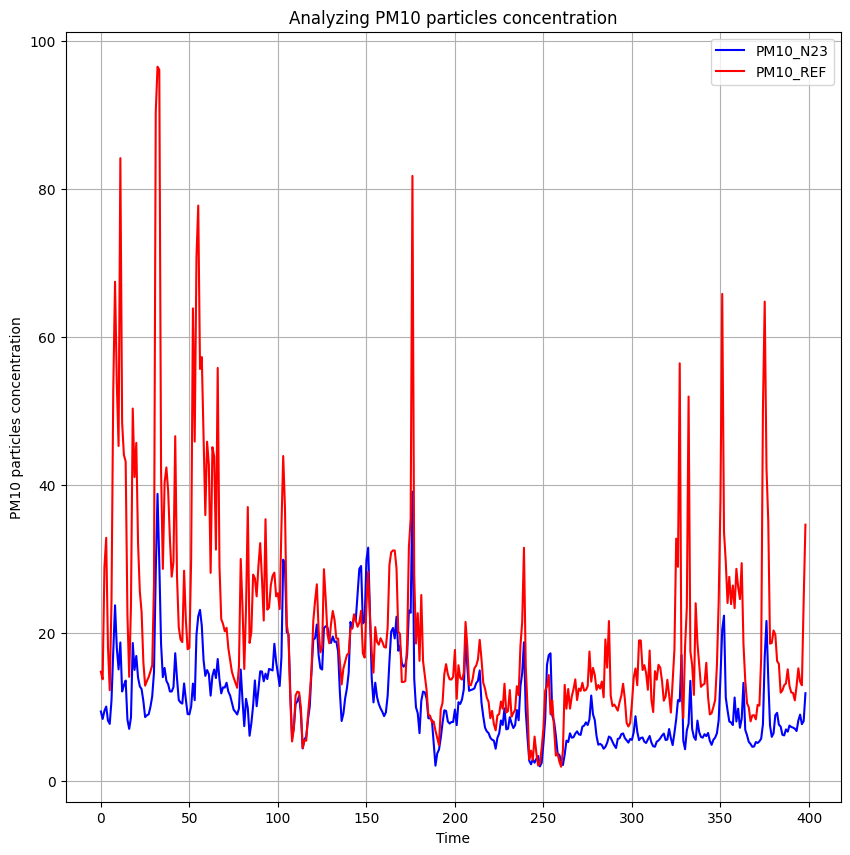

In [10]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing PM10 particles concentration')

plt.plot(df['PM10_N23'], label='PM10_N23', color='blue')
plt.plot(df['PM10_REF'], label='PM10_REF', color='red')

plt.xlabel('Time')
plt.ylabel('PM10 particles concentration')

plt.grid(True)
plt.legend()

plt.show()

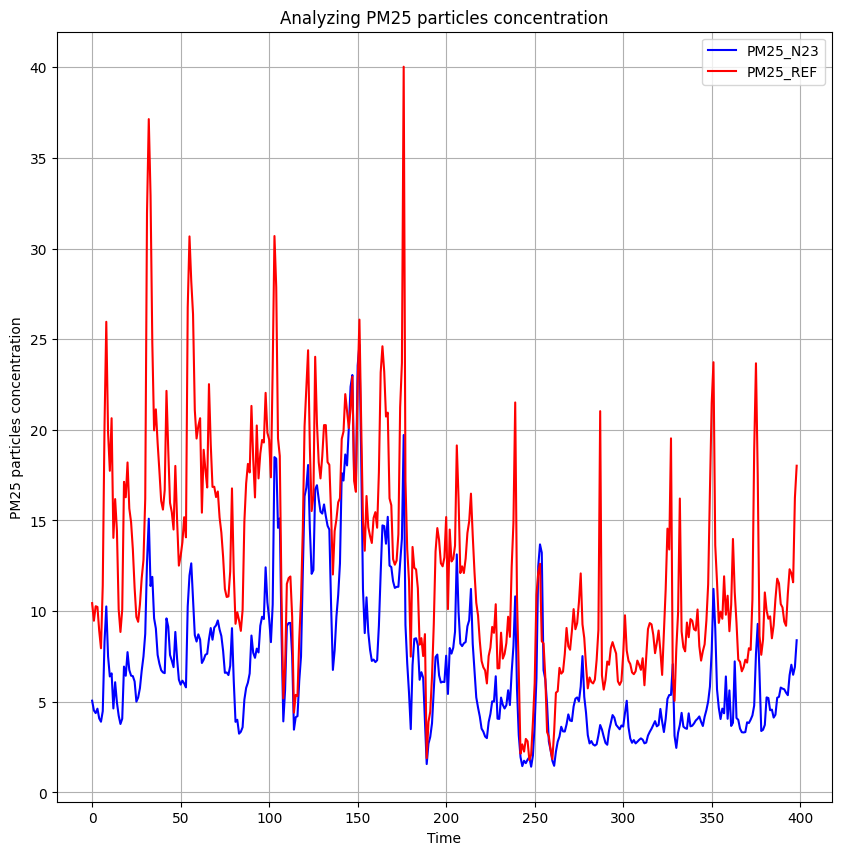

In [11]:
plt.figure(figsize=(10, 10))
plt.title('Analyzing PM25 particles concentration')

plt.plot(df['PM25_N23'], label='PM25_N23', color='blue')
plt.plot(df['PM25_REF'], label='PM25_REF', color='red')

plt.xlabel('Time')
plt.ylabel('PM25 particles concentration')

plt.grid(True)
plt.legend()

plt.show()

**Prepare dataset for machine learning**  

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
all_features = ['T_N23', 'rH_N23', 'PM10_N23']

X = df[all_features].values
y = df['PM10_REF'].values.reshape(-1, 1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)

In [14]:
all_features_ = ['T_N23', 'rH_N23', 'PM25_N23']

X_ = df[all_features_].values
y_ = df['PM25_REF'].values.reshape(-1, 1)

scaler_X_ = StandardScaler()
scaler_y_ = StandardScaler()

X_scaled_ = scaler_X_.fit_transform(X_)
y_scaled_ = scaler_y_.fit_transform(y_)

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled_, y_scaled_, test_size=0.2)

In [58]:
import pennylane as qml

**Initialize amount of qubits and device**  

In [16]:
n_qubits = len(all_features)
dev = qml.device("default.qubit", wires=n_qubits)

**Transform dataset features to quantum states for machine learning**  

In [17]:
def angle_embedding(features, wires):
    qml.AngleEmbedding(features, wires=wires, rotation="X")

**Create 1 layer of quantum circuit. Apply arbitraty 3-angle rotation to each qubit. Entangle qubits with CNOT gates in a consecutive chain. Also connect first and last qubits with CNOT gate making a ring-shaped entangled structure.**  

In [18]:
def variational_layer(weights, wires):
    for i, wire in enumerate(wires):
        qml.Rot(weights[i*3], weights[i*3+1], weights[i*3+2], wires=wire)
    for i in range(len(wires) - 1):
        qml.CNOT(wires=[wires[i], wires[i+1]])
    qml.CNOT(wires=[wires[-1], wires[0]])

**Collect model**  

In [19]:
@qml.qnode(dev)
def qlr_circuit(features, weights):
    angle_embedding(features, wires=range(n_qubits))
    variational_layer(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

In [20]:
import numpy as np

**Different loss functions to try out with both PM_10 and PM_25**  

In [21]:
def cost_mse(weights, X, y):
    predictions = np.array([qlr_circuit(x, weights) for x in X])
    return np.mean((predictions - y.flatten())**2)

In [22]:
def cost_mae(weights, X, y):
    predictions = np.array([qlr_circuit(x, weights) for x in X])
    return np.mean(np.abs(predictions - y.flatten()))

In [23]:
def cost_huber(weights, X, y, delta=1.0):
    predictions = np.array([qlr_circuit(x, weights) for x in X])
    abs_error = np.abs(predictions - y.flatten())
    mask = abs_error <= delta
    squared_error = (predictions - y.flatten())**2
    linear_error = abs_error
    return np.mean(np.where(mask, squared_error, linear_error))

In [24]:
def cost_quantile(weights, X, y, quantile=0.5):
    predictions = np.array([qlr_circuit(x, weights) for x in X])
    error = predictions - y.flatten()
    return np.mean(np.maximum(quantile * error, (quantile - 1) * error))

In [25]:
def cost_log(weights, X, y):
    predictions = np.array([qlr_circuit(x, weights) for x in X])
    error = predictions - y.flatten()
    return np.mean(np.log(np.cosh(error)))

In [26]:
def predict(X, weights):
    predictions_scaled = np.array([qlr_circuit(x, weights) for x in X])
    predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))
    return predictions

In [27]:
from pennylane import numpy as np

## PM10

In [28]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_mse(w, X_train, y_train), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 1.454737635170627
Epoch 3: Cost = 1.4421667334671922
Epoch 5: Cost = 1.4293046418182953
Epoch 7: Cost = 1.4161784055047741
Epoch 9: Cost = 1.4028152592135623
Epoch 11: Cost = 1.389243719052874
Epoch 13: Cost = 1.375494644160111
Epoch 15: Cost = 1.361602141941103
Epoch 17: Cost = 1.347604175086918
Epoch 19: Cost = 1.333542782381953
Epoch 21: Cost = 1.3194639154845496
Epoch 23: Cost = 1.3054169655065344
Epoch 25: Cost = 1.2914540770918501
Epoch 27: Cost = 1.277629332435613
Epoch 29: Cost = 1.263997858252565
Epoch 31: Cost = 1.2506148841048033
Epoch 33: Cost = 1.2375347674169024
Epoch 35: Cost = 1.2248099973853244
Epoch 37: Cost = 1.2124901924768599
Epoch 39: Cost = 1.2006211102571362
Epoch 41: Cost = 1.189243691045845
Epoch 43: Cost = 1.1783931564925911
Epoch 45: Cost = 1.1680981792045997
Epoch 47: Cost = 1.1583801288973108
Epoch 49: Cost = 1.1492523843588431
Epoch 51: Cost = 1.1407196848332544
Epoch 53: Cost = 1.1327775027771738
Epoch 55: Cost = 1.125411509144349
Epoch 5

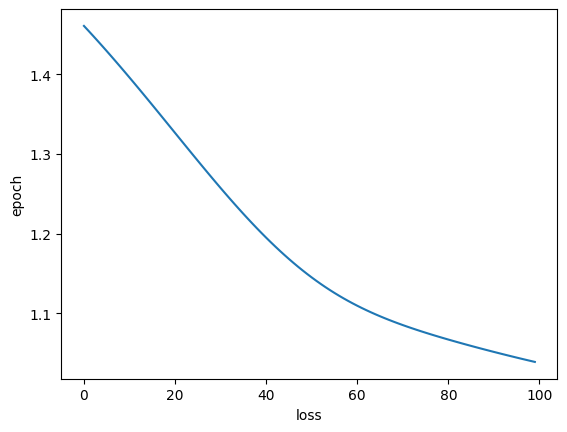

In [29]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [30]:
predictions = predict(X_test, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y.inverse_transform(y_test), predictions)
mse = mean_squared_error(scaler_y.inverse_transform(y_test), predictions)
rmse = root_mean_squared_error(scaler_y.inverse_transform(y_test), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: 0.07385272735656279
MSE: 90.71596553713593
RMSE: 9.524492928084724


In [31]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_mae(w, X_train, y_train), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.8855011226413722
Epoch 3: Cost = 0.876096375802746
Epoch 5: Cost = 0.8666147985560461
Epoch 7: Cost = 0.8570689509347147
Epoch 9: Cost = 0.8474450143230042
Epoch 11: Cost = 0.8377912525164286
Epoch 13: Cost = 0.8281778214897325
Epoch 15: Cost = 0.8185971600863018
Epoch 17: Cost = 0.8090232531385794
Epoch 19: Cost = 0.7995514393807591
Epoch 21: Cost = 0.790339495021102
Epoch 23: Cost = 0.7812314464983553
Epoch 25: Cost = 0.7722799655318522
Epoch 27: Cost = 0.7636379425640574
Epoch 29: Cost = 0.7552739786959203
Epoch 31: Cost = 0.7471869579323667
Epoch 33: Cost = 0.7394823410971428
Epoch 35: Cost = 0.7320765753631269
Epoch 37: Cost = 0.7249314424133303
Epoch 39: Cost = 0.7181154746776951
Epoch 41: Cost = 0.7117690958222647
Epoch 43: Cost = 0.7057542864792365
Epoch 45: Cost = 0.7000459728641402
Epoch 47: Cost = 0.694670965729795
Epoch 49: Cost = 0.6896351041192339
Epoch 51: Cost = 0.6851765765331994
Epoch 53: Cost = 0.6810743463963713
Epoch 55: Cost = 0.6772633099192056


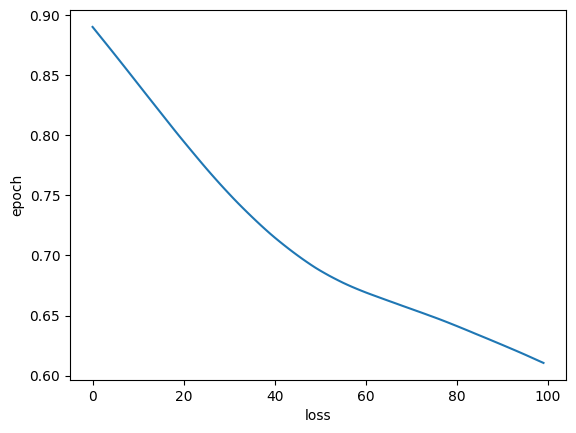

In [32]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [33]:
predictions = predict(X_test, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y.inverse_transform(y_test), predictions)
mse = mean_squared_error(scaler_y.inverse_transform(y_test), predictions)
rmse = root_mean_squared_error(scaler_y.inverse_transform(y_test), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: 0.11498434052608963
MSE: 86.68713112495477
RMSE: 9.310592415359764


In [34]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_huber(w, X_train, y_train), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.6513864937410702
Epoch 3: Cost = 0.6420325663016503
Epoch 5: Cost = 0.6325981714935979
Epoch 7: Cost = 0.6230528574925325
Epoch 9: Cost = 0.6135431946564466
Epoch 11: Cost = 0.6040992752122867
Epoch 13: Cost = 0.5947059384038564
Epoch 15: Cost = 0.5854468817593047
Epoch 17: Cost = 0.5762848318915397
Epoch 19: Cost = 0.5672489815099232
Epoch 21: Cost = 0.5583237462375593
Epoch 23: Cost = 0.5496382775258404
Epoch 25: Cost = 0.5411279133900686
Epoch 27: Cost = 0.532919205099261
Epoch 29: Cost = 0.5250864266319137
Epoch 31: Cost = 0.5176594889922902
Epoch 33: Cost = 0.5106938314215219
Epoch 35: Cost = 0.5042439348516216
Epoch 37: Cost = 0.4983047889637926
Epoch 39: Cost = 0.49289402613635963
Epoch 41: Cost = 0.48801290368466366
Epoch 43: Cost = 0.48364467836905106
Epoch 45: Cost = 0.4797989023976286
Epoch 47: Cost = 0.4764450637279974
Epoch 49: Cost = 0.4735192714574457
Epoch 51: Cost = 0.470952539022495
Epoch 53: Cost = 0.4687161682784134
Epoch 55: Cost = 0.4667612237719

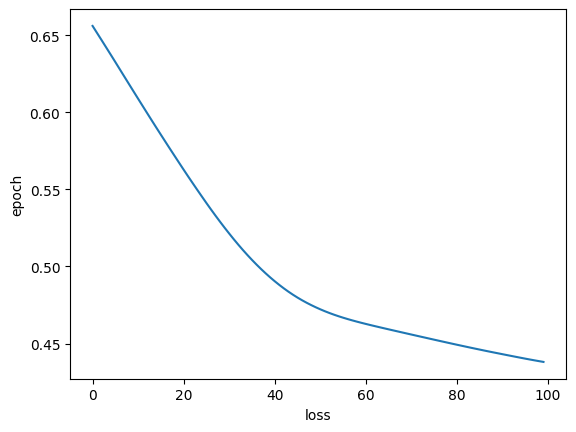

In [35]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [36]:
predictions = predict(X_test, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y.inverse_transform(y_test), predictions)
mse = mean_squared_error(scaler_y.inverse_transform(y_test), predictions)
rmse = root_mean_squared_error(scaler_y.inverse_transform(y_test), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: 0.21318452542060762
MSE: 77.06843996020615
RMSE: 8.778863249886408


In [37]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_quantile(w, X_train, y_train), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.36712756666400503
Epoch 3: Cost = 0.36427954585758876
Epoch 5: Cost = 0.36137867377266414
Epoch 7: Cost = 0.3584332347460925
Epoch 9: Cost = 0.3555472101688979
Epoch 11: Cost = 0.3527524593630916
Epoch 13: Cost = 0.349993455643568
Epoch 15: Cost = 0.3474119119141592
Epoch 17: Cost = 0.3450112234506379
Epoch 19: Cost = 0.3427586751148717
Epoch 21: Cost = 0.3405827564737189
Epoch 23: Cost = 0.3385427397894676
Epoch 25: Cost = 0.33671625872870453
Epoch 27: Cost = 0.3349864255919763
Epoch 29: Cost = 0.33339595144487894
Epoch 31: Cost = 0.3319737964467465
Epoch 33: Cost = 0.3306663406961852
Epoch 35: Cost = 0.32940753440093645
Epoch 37: Cost = 0.3281777537210747
Epoch 39: Cost = 0.3269715585437058
Epoch 41: Cost = 0.3257750886105004
Epoch 43: Cost = 0.3246486108029023
Epoch 45: Cost = 0.3235356961149366
Epoch 47: Cost = 0.32241532776051307
Epoch 49: Cost = 0.3212871088069553
Epoch 51: Cost = 0.3201802617188552
Epoch 53: Cost = 0.31908869267156975
Epoch 55: Cost = 0.3180561

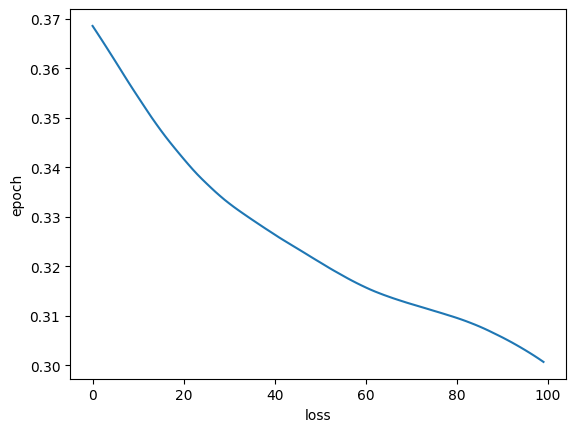

In [38]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [39]:
predictions = predict(X_test, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y.inverse_transform(y_test), predictions)
mse = mean_squared_error(scaler_y.inverse_transform(y_test), predictions)
rmse = root_mean_squared_error(scaler_y.inverse_transform(y_test), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: 0.1618319856013415
MSE: 82.09841237398061
RMSE: 9.060817423057404


In [40]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_log(w, X_train, y_train), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.47724487921027825
Epoch 3: Cost = 0.4730919223264788
Epoch 5: Cost = 0.46893474903090904
Epoch 7: Cost = 0.46478547176880275
Epoch 9: Cost = 0.46065569229203035
Epoch 11: Cost = 0.4565564095263055
Epoch 13: Cost = 0.4524977650196161
Epoch 15: Cost = 0.44848867410692755
Epoch 17: Cost = 0.44453637292403414
Epoch 19: Cost = 0.4406459068219776
Epoch 21: Cost = 0.43681958933601445
Epoch 23: Cost = 0.43305647015329735
Epoch 25: Cost = 0.4293518648338431
Epoch 27: Cost = 0.4256970177412078
Epoch 29: Cost = 0.422078990074486
Epoch 31: Cost = 0.4184808799279088
Epoch 33: Cost = 0.4148824777508003
Epoch 35: Cost = 0.41126142166724355
Epoch 37: Cost = 0.4075948324345475
Epoch 39: Cost = 0.4038612887809719
Epoch 41: Cost = 0.40004289174734153
Epoch 43: Cost = 0.3961271165449863
Epoch 45: Cost = 0.39210819343844633
Epoch 47: Cost = 0.3879878751000631
Epoch 49: Cost = 0.3837755789319509
Epoch 51: Cost = 0.37948798615268287
Epoch 53: Cost = 0.3751482173778255
Epoch 55: Cost = 0.370

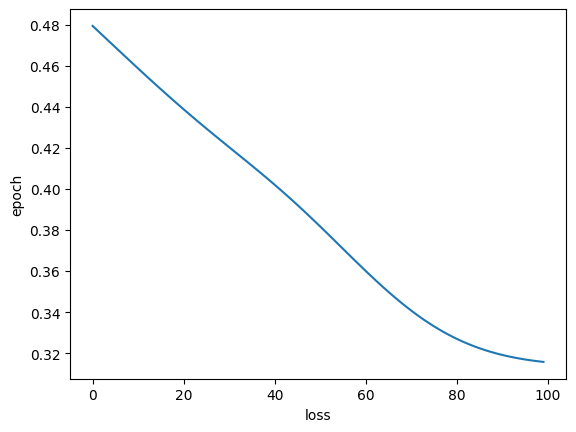

In [41]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [42]:
predictions = predict(X_test, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y.inverse_transform(y_test), predictions)
mse = mean_squared_error(scaler_y.inverse_transform(y_test), predictions)
rmse = root_mean_squared_error(scaler_y.inverse_transform(y_test), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: 0.02665666492171459
MSE: 95.33881170835879
RMSE: 9.764159549513659


## PM25

In [43]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_mse(w, X_train_, y_train_), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 1.0166102593287507
Epoch 3: Cost = 1.0108948180301904
Epoch 5: Cost = 1.0048956863145388
Epoch 7: Cost = 0.9986289165199017
Epoch 9: Cost = 0.9921067589845758
Epoch 11: Cost = 0.9853318915639784
Epoch 13: Cost = 0.9783055896273617
Epoch 15: Cost = 0.9710394957431029
Epoch 17: Cost = 0.9635530807980071
Epoch 19: Cost = 0.955870079920546
Epoch 21: Cost = 0.9480172095637559
Epoch 23: Cost = 0.9400235013950308
Epoch 25: Cost = 0.9319196603668428
Epoch 27: Cost = 0.9237373105434818
Epoch 29: Cost = 0.9155080771069377
Epoch 31: Cost = 0.9072624441981011
Epoch 33: Cost = 0.8990282981339458
Epoch 35: Cost = 0.8908290923598147
Epoch 37: Cost = 0.882681848342801
Epoch 39: Cost = 0.8745959654092572
Epoch 41: Cost = 0.8665745586494679
Epoch 43: Cost = 0.8586188740858102
Epoch 45: Cost = 0.8507330459066752
Epoch 47: Cost = 0.8429256596887396
Epoch 49: Cost = 0.8352078302909375
Epoch 51: Cost = 0.8275898292983005
Epoch 53: Cost = 0.8200779673313376
Epoch 55: Cost = 0.8126728185276931

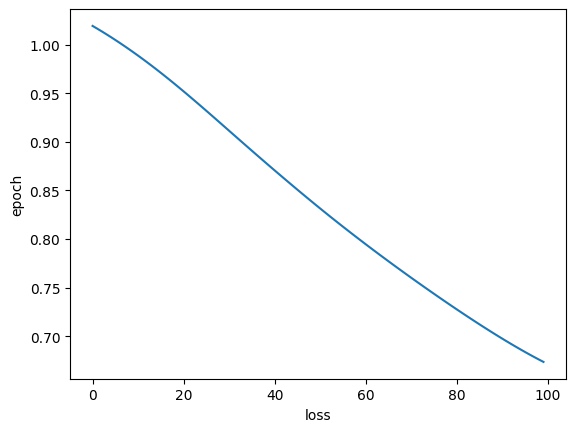

In [44]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [45]:
predictions = predict(X_test_, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y_.inverse_transform(y_test_), predictions)
mse = mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)
rmse = root_mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: -0.15756393853975514
MSE: 42.43781110101744
RMSE: 6.514430988276523


In [46]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_mae(w, X_train_, y_train_), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.7874614464932235
Epoch 3: Cost = 0.7862522561046262
Epoch 5: Cost = 0.7852702631978644
Epoch 7: Cost = 0.7844780178223433
Epoch 9: Cost = 0.7837938204652114
Epoch 11: Cost = 0.7831421394050846
Epoch 13: Cost = 0.7824935277519913
Epoch 15: Cost = 0.7819557268107629
Epoch 17: Cost = 0.7814258371090681
Epoch 19: Cost = 0.7809376958092933
Epoch 21: Cost = 0.7802905695634352
Epoch 23: Cost = 0.7794792865938548
Epoch 25: Cost = 0.7784311836739739
Epoch 27: Cost = 0.7771603567785952
Epoch 29: Cost = 0.7756755664881231
Epoch 31: Cost = 0.7740786186807375
Epoch 33: Cost = 0.7722632176491585
Epoch 35: Cost = 0.7701298835067738
Epoch 37: Cost = 0.7677635310776832
Epoch 39: Cost = 0.7651523028347507
Epoch 41: Cost = 0.7623149155403899
Epoch 43: Cost = 0.7593458446095724
Epoch 45: Cost = 0.7561303923148549
Epoch 47: Cost = 0.7528253686493518
Epoch 49: Cost = 0.7492626135867059
Epoch 51: Cost = 0.7454591431609777
Epoch 53: Cost = 0.7415610207122394
Epoch 55: Cost = 0.73747572379355

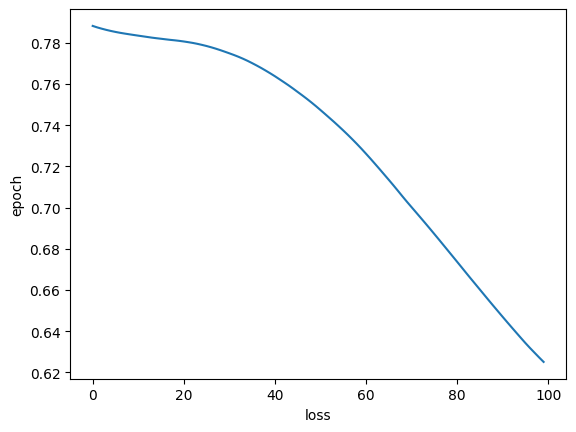

In [47]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [48]:
predictions = predict(X_test_, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y_.inverse_transform(y_test_), predictions)
mse = mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)
rmse = root_mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: -0.47848004398888744
MSE: 54.203016122439024
RMSE: 7.362269767024231


In [49]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_huber(w, X_train_, y_train_), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.7568409565398193
Epoch 3: Cost = 0.7536374430680386
Epoch 5: Cost = 0.7504973536909489
Epoch 7: Cost = 0.7473062748743541
Epoch 9: Cost = 0.744166574958239
Epoch 11: Cost = 0.7410549741972042
Epoch 13: Cost = 0.7379111111415374
Epoch 15: Cost = 0.7347597073030457
Epoch 17: Cost = 0.7315655962271467
Epoch 19: Cost = 0.7283016395129521
Epoch 21: Cost = 0.7249592153131179
Epoch 23: Cost = 0.7215505928468278
Epoch 25: Cost = 0.7180060591837315
Epoch 27: Cost = 0.7142772074263706
Epoch 29: Cost = 0.7103243314206068
Epoch 31: Cost = 0.7063368462866718
Epoch 33: Cost = 0.7023900556882513
Epoch 35: Cost = 0.6985690990654054
Epoch 37: Cost = 0.6948244002999067
Epoch 39: Cost = 0.69108546468991
Epoch 41: Cost = 0.6874883527502678
Epoch 43: Cost = 0.683980713404601
Epoch 45: Cost = 0.6806143704656771
Epoch 47: Cost = 0.6773953897123373
Epoch 49: Cost = 0.6742894194639726
Epoch 51: Cost = 0.6712514302445763
Epoch 53: Cost = 0.6682956125355666
Epoch 55: Cost = 0.6653615599007373
E

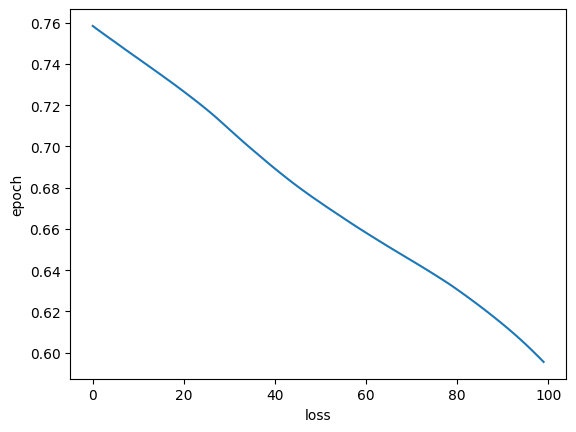

In [50]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [51]:
predictions = predict(X_test_, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y_.inverse_transform(y_test_), predictions)
mse = mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)
rmse = root_mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: -0.6162757812483464
MSE: 59.25478844675588
RMSE: 7.697713195927468


In [52]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_quantile(w, X_train_, y_train_), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.5205735371154412
Epoch 3: Cost = 0.5179431843158467
Epoch 5: Cost = 0.5150777288602485
Epoch 7: Cost = 0.5120241485898599
Epoch 9: Cost = 0.5087504075023909
Epoch 11: Cost = 0.5052592886225417
Epoch 13: Cost = 0.5015536422740362
Epoch 15: Cost = 0.4976274118656188
Epoch 17: Cost = 0.4934858048418634
Epoch 19: Cost = 0.48913607399272896
Epoch 21: Cost = 0.4845876213152847
Epoch 23: Cost = 0.479852063378688
Epoch 25: Cost = 0.474943247513295
Epoch 27: Cost = 0.46991252165297104
Epoch 29: Cost = 0.4647647711023864
Epoch 31: Cost = 0.4595044010124382
Epoch 33: Cost = 0.4541557995909896
Epoch 35: Cost = 0.4487984515553543
Epoch 37: Cost = 0.4434061113389442
Epoch 39: Cost = 0.43807849142795835
Epoch 41: Cost = 0.432771775492806
Epoch 43: Cost = 0.42754277623523407
Epoch 45: Cost = 0.4224668295134696
Epoch 47: Cost = 0.4175222467928005
Epoch 49: Cost = 0.4128346633841413
Epoch 51: Cost = 0.4084168382294615
Epoch 53: Cost = 0.40423319262111307
Epoch 55: Cost = 0.400291857946

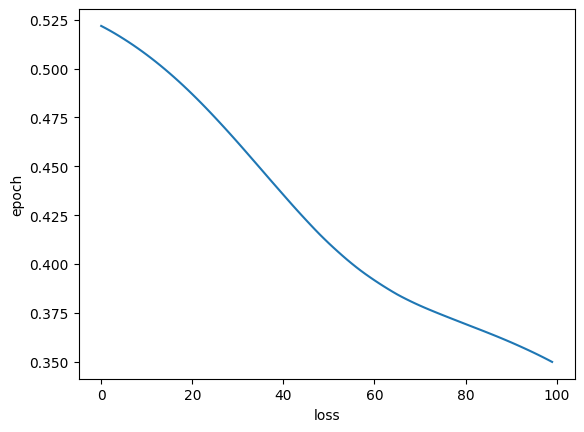

In [53]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [54]:
predictions = predict(X_test_, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y_.inverse_transform(y_test_), predictions)
mse = mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)
rmse = root_mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: -1.2824603331304574
MSE: 83.67798722647323
RMSE: 9.147567284610332


In [55]:
num_weights = n_qubits * 3
weights = np.random.randn(num_weights, requires_grad=True)
optimizer = qml.AdamOptimizer(stepsize=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    weights, cost_value = optimizer.step_and_cost(lambda w: cost_log(w, X_train_, y_train_), weights)
    loss_history.append(cost_value)
    if epoch % 2 != 0:
        print(f"Epoch {epoch}: Cost = {cost_value}")

Epoch 1: Cost = 0.519098366851615
Epoch 3: Cost = 0.5136822301545483
Epoch 5: Cost = 0.5081160300970875
Epoch 7: Cost = 0.5024023907842304
Epoch 9: Cost = 0.49653840241550234
Epoch 11: Cost = 0.49051223349278195
Epoch 13: Cost = 0.48430360189943045
Epoch 15: Cost = 0.4778930117587313
Epoch 17: Cost = 0.4712732221080615
Epoch 19: Cost = 0.4644521133772579
Epoch 21: Cost = 0.4574489799673984
Epoch 23: Cost = 0.450290648060551
Epoch 25: Cost = 0.4430091824745141
Epoch 27: Cost = 0.4356405899406097
Epoch 29: Cost = 0.42822389982460773
Epoch 31: Cost = 0.4208003250691268
Epoch 33: Cost = 0.4134123943439971
Epoch 35: Cost = 0.40610302924026176
Epoch 37: Cost = 0.398914575336991
Epoch 39: Cost = 0.3918878114938686
Epoch 41: Cost = 0.38506096906998255
Epoch 43: Cost = 0.3784687961259372
Epoch 45: Cost = 0.372141702504362
Epoch 47: Cost = 0.3661050204728973
Epoch 49: Cost = 0.36037841248694685
Epoch 51: Cost = 0.35497545266149133
Epoch 53: Cost = 0.3499034018781088
Epoch 55: Cost = 0.3451631883

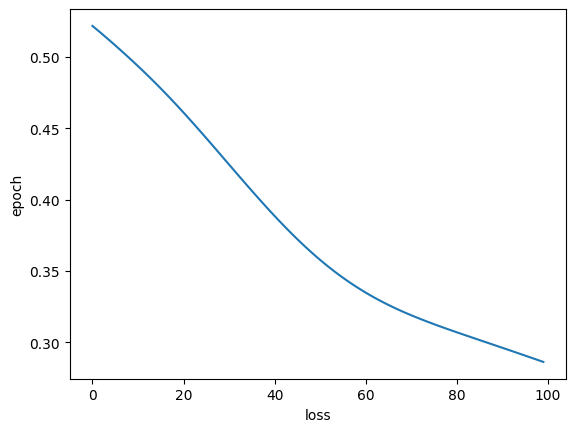

In [56]:
plt.plot(range(epochs), loss_history)
plt.xlabel("loss")
plt.ylabel("epoch")
plt.show()

In [57]:
predictions = predict(X_test_, weights)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(scaler_y_.inverse_transform(y_test_), predictions)
mse = mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)
rmse = root_mean_squared_error(scaler_y_.inverse_transform(y_test_), predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2: -1.5807922217686845
MSE: 94.61522526052076
RMSE: 9.727035790029806
